# Dane Przestrzenne w Pythonie - wektory

| Metadane              | Wartość                                                                                                            |
|-----------------------|--------------------------------------------------------------------------------------------------------------------|
| Kurs - adres YT       | [Dane Przestrzenne w Pythonie - wektory](https://www.youtube.com/playlist?list=PLDiotiqXJ72UjlnpDEVsTx-C1ICsGdMyP) |
| Część kursu           | 4.1 - Wprowadzenie do GeoPandas                                                                                    |
| Ostatnia aktualizacja | 2024-12-30                                                                                                         |
| Autor                 | Szymon Moliński                                                                                                    |



## Wprowadzenie do GeoPandas i obiektów typu GeoSeries i GeoDataFrame

W tym przykładzie wprowadzimy koncept geometrii jako specjalnej kolumny w ramkach danych. Zobaczymy, jak doprowadzić bazową ramkę danych `pandas`-a do obiektu type `GeoDataFrame`.

Wykorzystamy zbiór cen najmu krótkoterminowego AirBnB w Nowym Jorku, który nie jest typowo przestrzennym typem pliku. Wyprowadzimy w ten sposób `GeoDataFrame` z obiektu `DataFrame`. Adres, skąd pobrano dane: [https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)

In [50]:
import geopandas as gpd
import numpy as np
import pandas as pd

In [3]:
ny_dataset = 'data/AB_NYC_2019.csv'

In [4]:
df = pd.read_csv(ny_dataset, index_col='id')

In [5]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Tworzenie obiektu GeoDataFrame - Geometria

In [6]:
from geopandas import points_from_xy

In [7]:
points = points_from_xy(x=df['longitude'], y=df['latitude'], crs=4326)

In [8]:
type(points)

geopandas.array.GeometryArray

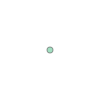

In [9]:
points[0]

In [10]:
points[:3]

<GeometryArray>
[<POINT (-73.972 40.647)>, <POINT (-73.984 40.754)>, <POINT (-73.942 40.809)>]
Length: 3, dtype: geometry

### Tworzenie obiektu GeoDataFrame - GeoSeries

In [11]:
geometry = gpd.GeoSeries(points)

In [12]:
type(geometry)

geopandas.geoseries.GeoSeries

In [13]:
geometry[:3]

0    POINT (-73.97237 40.64749)
1    POINT (-73.98377 40.75362)
2    POINT (-73.94190 40.80902)
dtype: geometry

<Axes: >

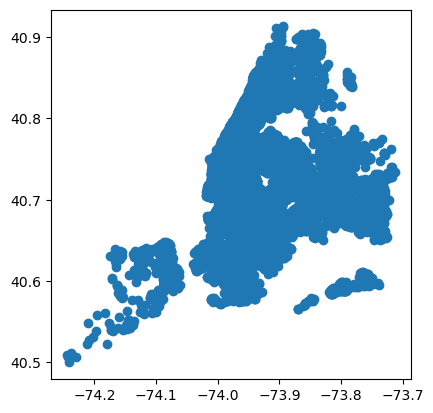

In [14]:
geometry.plot()

<Axes: >

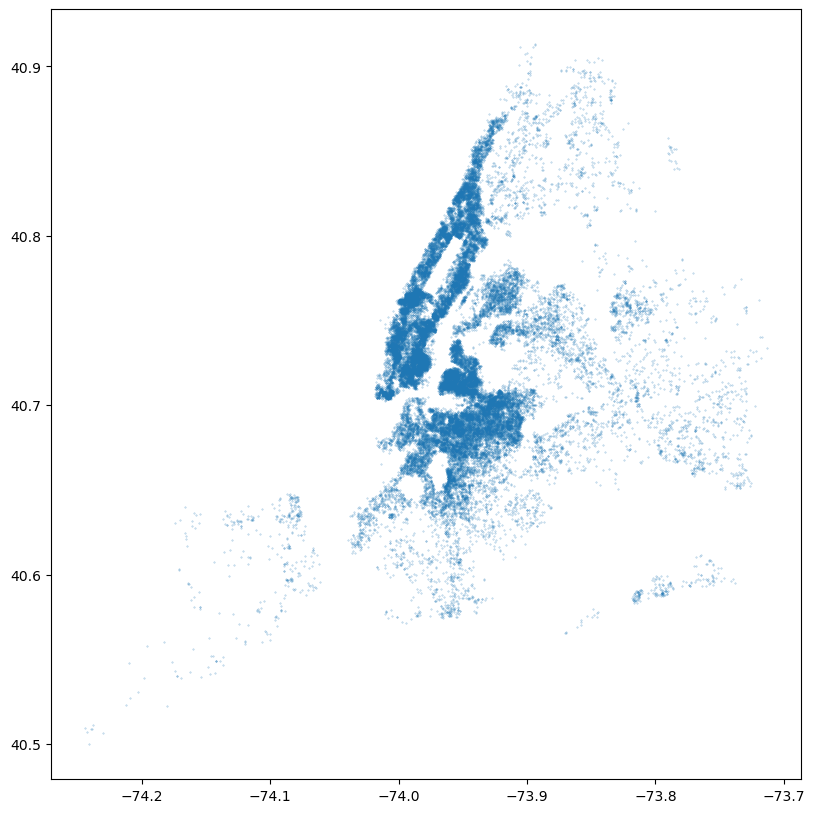

In [17]:
geometry.plot(alpha=0.5, markersize=0.1, figsize=(10, 10))

In [18]:
geometry.geom_type

0        Point
1        Point
2        Point
3        Point
4        Point
         ...  
48890    Point
48891    Point
48892    Point
48893    Point
48894    Point
Length: 48895, dtype: object

In [19]:
geometry.geom_type.unique()

array(['Point'], dtype=object)

In [20]:
geometry.total_bounds

array([-74.24442,  40.49979, -73.71299,  40.91306])

In [21]:
from typing import Union
from shapely import Polygon


def points_to_bounding_box(points: Union[gpd.GeoSeries, gpd.GeoDataFrame]):
    """
    Function transform a set of points into a Polygon with bounding box.

    Parameters
    ----------
    points : gpd.GeoSeries

    Returns
    -------
    bounding_box : Polygon
    """
    bounds = points.total_bounds

    x_min, y_min, x_max, y_max = bounds

    polygon_tuples = [
        (x_min, y_min), (x_max, y_min), (x_max, y_max), (x_min, y_max)
    ]

    polygon = Polygon(polygon_tuples)
    return polygon

In [22]:
poly = points_to_bounding_box(geometry)
poly_frame = gpd.GeoSeries(poly, crs=geometry.crs)

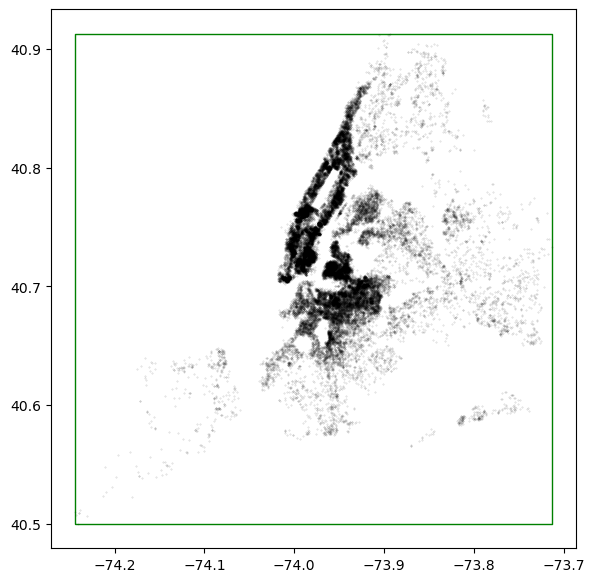

In [23]:
fs = (7, 7)

base = poly_frame.plot(color='white', edgecolor='green', figsize=fs)
geometry.plot(ax=base, color='black', markersize=0.1, alpha=0.2);

In [25]:
# geometry.explore()

In [28]:
# poly_frame.explore()

### Tworzenie obiektu GeoDataFrame - GeoDataFrame

In [39]:
df['geometry'] = points_from_xy(x=df['longitude'], y=df['latitude'], crs=4326)  # dodanie kolumny z geometrią

In [40]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [41]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [42]:
gdf.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
id,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.94190 40.80902)
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)


<Axes: >

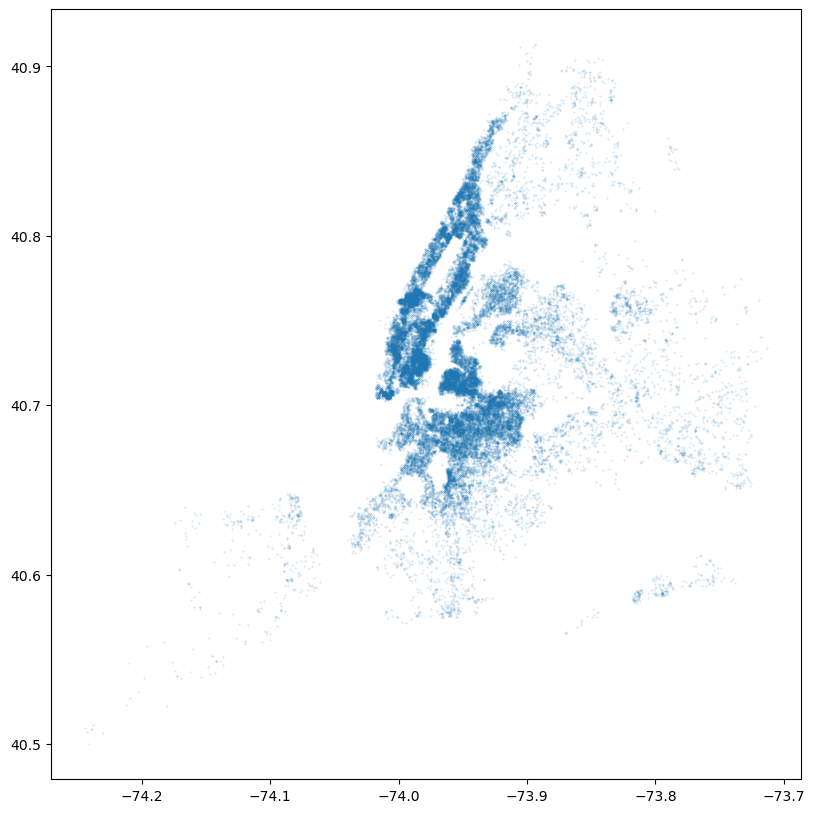

In [44]:
gdf.plot(alpha=0.3, markersize=0.1, figsize=(10, 10))

<Axes: >

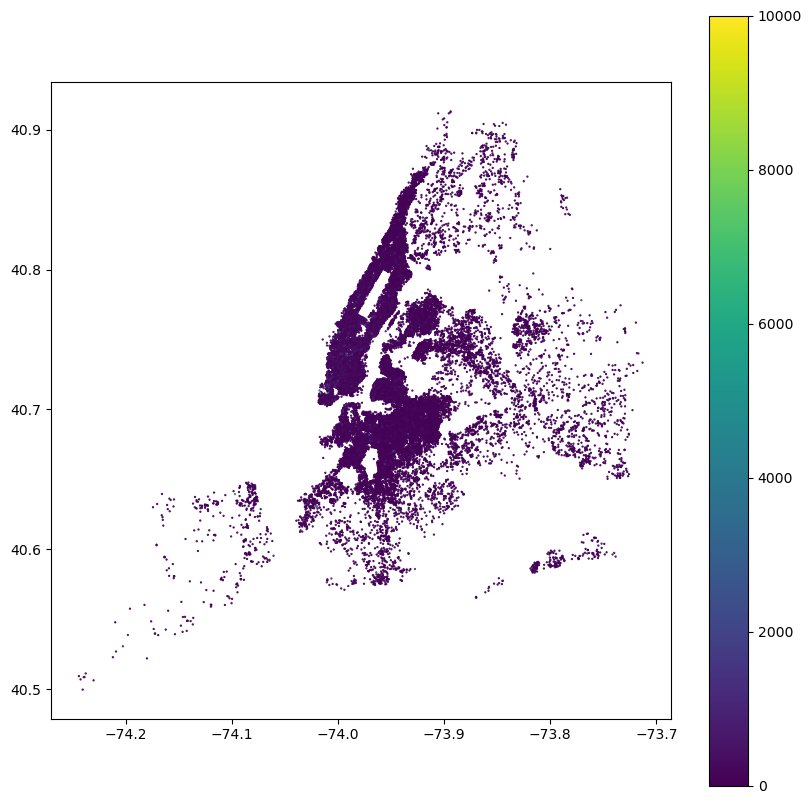

In [49]:
gdf.plot(column='price', legend=True, markersize=0.4, figsize=(10, 10))

In [58]:
gdf['price-log'] = gdf['price'].apply(lambda x: np.log(x) if x > 1 else 0)

<Axes: >

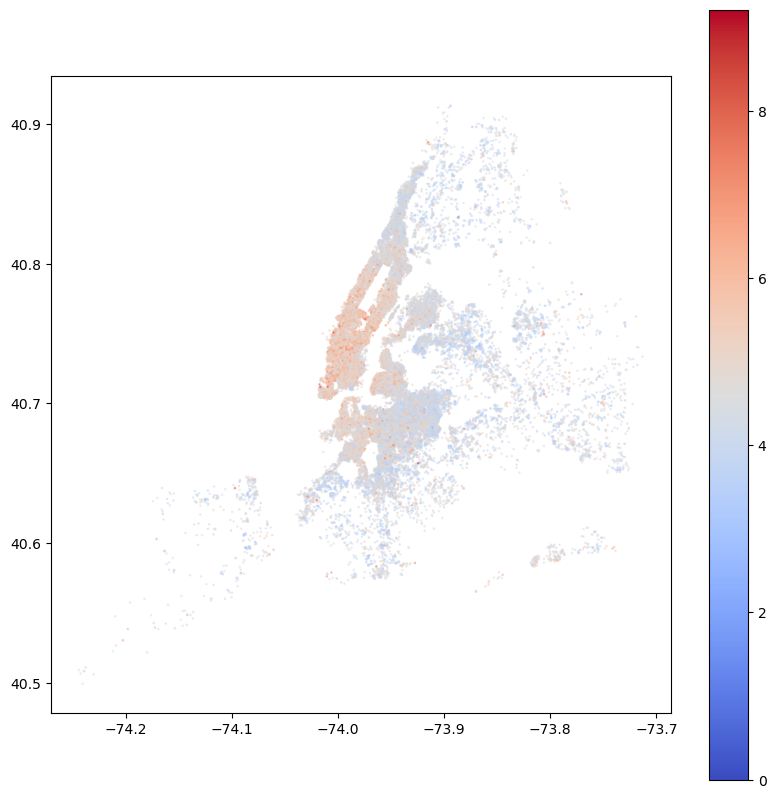

In [60]:
gdf.plot(column='price-log', legend=True, markersize=0.8, alpha=0.4, figsize=(10, 10), cmap='coolwarm')

End